# Particle Swarm Optimization

>Investigación y entendimiento del algoritmo.

La idea de este notebook es revisar la implementación del algoritmo particle swarm optimization de manera general para tener una idea de la lógica, intuición y los parámetros que éste contempla.

In [1]:
import random
import math
import matplotlib.pyplot as plt

Se define una función objetivo.

In [2]:
# función objetivo
def objective_function(x):
    y = x[0]**3 + x[1]**2
    return y

A continuación se definen los parámetros.

In [3]:
bounds=[(-4, 4), (-4, 4)]   # variables limite inferior y superior
nv = 2                          # numero de variables
mm = -1                         # problema de minimización, mm = -1; problema de mazimización, mm = 1

# Parámetros opcionales (Para optimizar el desempeño del PSO necesitamos optimizar estos parámetros)
particle_size = 100         # Número de particulas
iterations = 500            # Máximo número de iteraciones
w = 0.95                    # Constante inercia
c1 = 2                      # Constante cognitiva
c2 = 2                      # Constante social

Ahora revisaremos el algoritmo.

In [4]:
# Algoritmo
class Particle:
    def __init__(self, bounds):
        self.particle_position = []                     # posición de la particula
        self.particle_velocity = []                     # velocidad de la particula
        self.local_best_particle_position = []          # mejor posición de la particula
        self.fitness_local_best_particle_position = initial_fitness # valor inicial de la función objetivo de la mejor particula
        self.fitness_particle_position = initial_fitness            # valor de la función objetivo de la posición de la particula

        for i in range(nv):
            self.particle_position.append(random.uniform(bounds[i][0], bounds[i][1])) # generamos una posición inicial al azar
            self.particle_velocity.append(random.uniform(-1, 1)) # generamos la velocidad inicial al azar

    def evaluate(self, objective_function):
        self.fitness_particle_position = objective_function(self.particle_position)
        if mm == -1:
            if self.fitness_particle_position < self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position      # actualizamos el mejor "local"
                self.fitness_local_best_particle_position = self.fitness_particle_position # actualizamos el fitness del mejor "local"
        if mm == 1:
            if self.fitness_particle_position > self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position      # actualizamos el mejor "local"
                self.fitness_local_best_particle_position = self.fitness_particle_position # actualizamos el fitness del mejor "local"

    def update_velocity(self, global_best_particle_position):
        for i in range(nv):
            r1 = random.random()
            r2 = random.random()

            cognitive_velocity = c1*r1*(self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2*r2*(global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w*self.particle_velocity[i] + cognitive_velocity + social_velocity

    def update_position(self, bounds):
        for i in range(nv):
            self.particle_position[i] = self.particle_position[i] + self.particle_velocity[i]

            # Validamos y reparamos para satisfacer el limite superior
            if self.particle_position[i] > bounds[i][1]:
                self.particle_position[i] = bounds[i][1]

            # Validamos y reparamos para satisfacer el limite inferior
            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i] = bounds[i][0]

In [5]:
class PSO():
    def __init__(self, objective_function, bounds, particle_size, iterations):

        fitness_global_best_particle_position = initial_fitness
        global_best_particle_position = []

        swarm_particle = []
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))

        A = []
        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)

                if mm == -1:
                    if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
                if mm == 1:
                    if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)

            for j in range(particle_size):
                swarm_particle[j].update_velocity(global_best_particle_position)
                swarm_particle[j].update_position(bounds)

            A.append(fitness_global_best_particle_position) # Guardamos el mejor fitness

        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:', fitness_global_best_particle_position)
        print('Evolutionary process of the objective function value:')
        plt.plot(A)

if mm == -1:
    initial_fitness = float("inf") # Para problema de minimización
if mm == 1:
    initial_fitness = -float("inf") # Para problema de maximización

Optimal solution: [-4, 1.0547896897694642e-05]
Objective function value: -63.99999999988874
Evolutionary process of the objective function value:


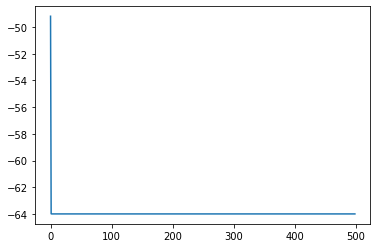

In [6]:
# Ejecutamos PSO
PSO(objective_function, bounds, particle_size, iterations)

## Puntos para recordar

+ Población: Enjambre (Swarm)
+ Soluciones: Particulas (Particles)
+ Valor asignado a cada particula: fitness
+ Las particulas se mueven en el espacio de busqueda (search-space)
+ Los movimientos de las particulas son guiados por:
  - Conocimiento de su mejor posición en el espacio de busqueda.
  - Conocimiento de la mejor posición del enjambre entero.
+ Cuando mejores posiciones sean descubiertas estas guiaran los movimientos del enjambre.
+ Iteramos hasta encontrar una solución. (No siempre se encuentra una solución)
+ La meta es minimizar o maximizar una función de costo.
+ Ventaja. Rapidez para converger.
+ Desventaja. Puede quedar atrapado en un mínimo local en lugar del mínimo global.
+ No calcula derivadas como otros optimizadores por lo que se puede utilizar para funciones no diferenciables.

### Referencias:

http://ijcsi.org/papers/IJCSI-9-6-2-264-271.pdf

https://www.youtube.com/watch?v=JhgDMAm-imI

https://www.youtube.com/watch?v=7uZcuaUvwq0&t=134s